## On-Line Data Sources

Python makes it straightforward to query online databases programmatically.

An important database for economists is [FRED](https://research.stlouisfed.org/fred2/) — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment rate](https://research.stlouisfed.org/fred2/series/UNRATE).

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering
this URL into your browser (note that this requires an internet connection)

```text
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```


(Equivalently, click here: [https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv](https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv))

This request returns a CSV file, which will be handled by your default application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with requests

One option is to use [requests](https://requests.readthedocs.io/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

If there’s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1. You are not connected to the Internet — hopefully, this isn’t the case.  
1. Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.  


In the second case, you can either

- switch to another machine  
- solve your proxy problem by reading [the documentation](https://requests.readthedocs.io/en/master/)  


Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [16]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = (
    requests.get(url)
            .content
            .decode()
            .split("\n")
)
print(source[0])
print(source[1])
print(source[2])

DATE,VALUE
1948-01-01,3.4
1948-02-01,3.8


We could now write some additional code to parse this text and store it as an array.

But this is unnecessary — pandas’ `read_csv` function can handle the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [17]:
data = pd.read_csv(url, index_col=0, parse_dates=True)
type(data)
data.head(2)

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8


We can also plot the unemployment rate from 2006 to 2012 as follows

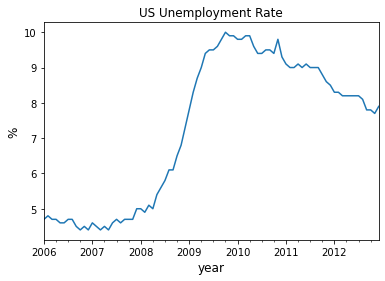

In [19]:
ax = data['2006':'2012'].plot(
    title='US Unemployment Rate', 
    legend=False
)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

Note that pandas offers many other file type alternatives.

Pandas has [a wide variety](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server.

### Using pandas_datareader to Access Data


<a id='index-8'></a>
The maker of pandas has also authored a library called pandas_datareader that gives programmatic access to many data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important (e.g., FRED, [OECD](https://data.oecd.org/), [EUROSTAT](https://ec.europa.eu/eurostat/data/database) and the World Bank) are free to use.

For now let’s work through one example of downloading and plotting data — this
time from the World Bank.

The World Bank [collects and organizes data](http://data.worldbank.org/indicator) on a huge range of indicators.

For example, [here’s](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries) some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for the US and Australia

In [ ]:
# !pip install pandas_datareader

In [ ]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()